In [ ]:
pip install plotly


In [ ]:
pip install dash

In [ ]:

pip install pandas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as pyo
import plotly.graph_objs as go
import dash
import dash_core_components as dcc
import dash_html_components as html
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc, adjusted_rand_score
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn import svm
from scipy.stats import pearsonr, spearmanr
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline


<ipython-input-1-34ea50b5fc40>:7: UserWarning:


The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`

<ipython-input-1-34ea50b5fc40>:8: UserWarning:


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`



In [2]:
import pandas as pd

# Read the CSV files
country = pd.read_csv('countries.csv',sep = ',')

commodity = pd.read_excel('commodity_trade_statistics_data-2016.xlsx')

# Merge the dataframes
merged_df = pd.merge(commodity, country, on='Country', how='left')




In [3]:

 merged_df.shape



(37408, 30)

In [4]:
# Compréhension des données

In [5]:
merged_df.shape

(37408, 30)

In [6]:
merged_df.columns

Index(['Country', 'year', 'comm_code', 'commodity', 'flow', 'trade_usd',
       'weight_kg', 'quantity_name', 'quantity', 'category', 'Region',
       'Population (millions)', 'HDI', 'GDP per Capita', 'Cropland Footprint',
       'Grazing Footprint', 'Forest Footprint', 'Carbon Footprint',
       'Fish Footprint', 'Total Ecological Footprint', 'Cropland',
       'Grazing Land', 'Forest Land', 'Fishing Water', 'Urban Land',
       'Total Biocapacity', 'Biocapacity Deficit or Reserve',
       'Earths Required', 'Countries Required', 'Data Quality'],
      dtype='object')

In [7]:
merged_df= merged_df.drop(columns=['Region', 'year', 'comm_code',
       'Population (millions)', 'HDI', 'GDP per Capita', 'Cropland Footprint',
       'Grazing Footprint', 'Forest Footprint', 
       'Fish Footprint', 'Total Ecological Footprint', 'Cropland',
       'Grazing Land', 'Forest Land', 'Fishing Water', 'Urban Land',
       'Total Biocapacity', 'Biocapacity Deficit or Reserve',
       'Earths Required', 'Countries Required', 'Data Quality'])

In [8]:
merged_df.tail()

,Country,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category,Carbon Footprint
37403,Madagascar,"Seaweeds and other algae,",Export,1014203,1687717.0,Weight in kilograms,1687717.0,12_oil_seed_oleagic_fruits_grain_seed_fruit_et...,0.07
37404,Madagascar,Vegetable products nes for human consumption,Import,4137,1369.0,Weight in kilograms,1369.0,12_oil_seed_oleagic_fruits_grain_seed_fruit_et...,0.07
37405,Madagascar,"Cereal straw & husks, unprepared",Export,11,4.0,Weight in kilograms,4.0,12_oil_seed_oleagic_fruits_grain_seed_fruit_et...,0.07
37406,Madagascar,Lucerne (alfalfa) meal and pellets,Import,1720,2000.0,Weight in kilograms,2000.0,12_oil_seed_oleagic_fruits_grain_seed_fruit_et...,0.07
37407,Madagascar,"Other fodder and forage products, roots, etc.",Import,22021,66080.0,Weight in kilograms,66080.0,12_oil_seed_oleagic_fruits_grain_seed_fruit_et...,0.07


In [9]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37408 entries, 0 to 37407
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           37408 non-null  object 
 1   commodity         37408 non-null  object 
 2   flow              37408 non-null  object 
 3   trade_usd         37408 non-null  int64  
 4   weight_kg         36870 non-null  float64
 5   quantity_name     37408 non-null  object 
 6   quantity          36415 non-null  float64
 7   category          37408 non-null  object 
 8   Carbon Footprint  28686 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 2.9+ MB


In [10]:
merged_df.dtypes 

Country              object
commodity            object
flow                 object
trade_usd             int64
weight_kg           float64
quantity_name        object
quantity            float64
category             object
Carbon Footprint    float64
dtype: object

In [14]:
merged_df.describe()

,trade_usd,weight_kg,quantity,Carbon Footprint
count,3.740800e+04,3.687000e+04,3.641500e+04,28686.000000
mean,2.201496e+07,3.381471e+07,4.025141e+07,2.507078
std,2.495018e+08,7.108429e+08,1.174051e+09,2.035636
min,1.000000e+00,0.000000e+00,0.000000e+00,0.070000
25%,1.751450e+04,4.812250e+03,4.219500e+03,1.060000
50%,2.611290e+05,9.822800e+04,9.646300e+04,2.150000
75%,3.070000e+06,1.486965e+06,1.509268e+06,3.230000
max,3.398115e+10,8.391329e+10,1.758724e+11,12.650000


In [15]:
merged_df.describe(include=['object'])

,Country,commodity,flow,quantity_name,category
count,37408,37408,37408,37408,37408
unique,122,426,4,3,12
top,Canada,"Rice, semi-milled or wholly milled",Import,Weight in kilograms,08_edible_fruit_nuts_peel_of_citrus_fruit_melons
freq,1301,245,20636,33990,3725


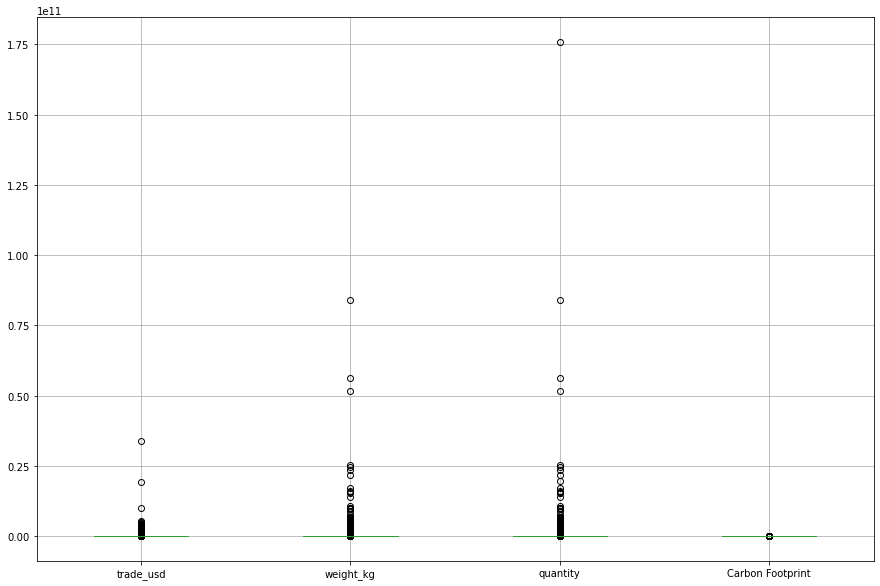

In [16]:
merged_df.iloc[:,1:].boxplot(figsize=(15,10));

In [17]:
merged_df.iloc[:,1:].corr()

,trade_usd,weight_kg,quantity,Carbon Footprint
trade_usd,1.000000,0.877439,0.534227,0.008549
weight_kg,0.877439,1.000000,0.611267,-0.000508
quantity,0.534227,0.611267,1.000000,0.002934
Carbon Footprint,0.008549,-0.000508,0.002934,1.000000


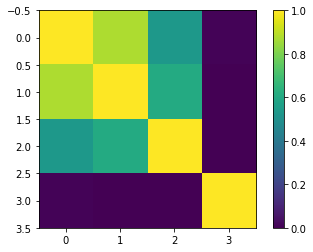

In [18]:
plt.imshow(merged_df.iloc[:,1:].corr());
plt.colorbar();

In [19]:
merged_df.isna().sum()


Country                0
commodity              0
flow                   0
trade_usd              0
weight_kg            538
quantity_name          0
quantity             993
category               0
Carbon Footprint    8722
dtype: int64

# Feature Engineering

In [20]:
##val NA whith mean
merged_df.fillna(merged_df.mean(), inplace=True)


In [21]:
merged_df.isna().sum()

Country             0
commodity           0
flow                0
trade_usd           0
weight_kg           0
quantity_name       0
quantity            0
category            0
Carbon Footprint    0
dtype: int64

In [22]:
import seaborn as sb
import numpy as np

features =['trade_usd','weight_kg','quantity','Carbon Footprint']

def impute(merged_df, feature):
    q1 = np.percentile(merged_df[feature] , 25)
    q3 = np.percentile(merged_df[feature] , 75)
    iqr = q3 - q1 
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    merged_df.loc[merged_df[feature] < lower, feature] = lower
    merged_df.loc[merged_df[feature] > upper, feature] = upper

for feature in features:
    impute(merged_df, feature)

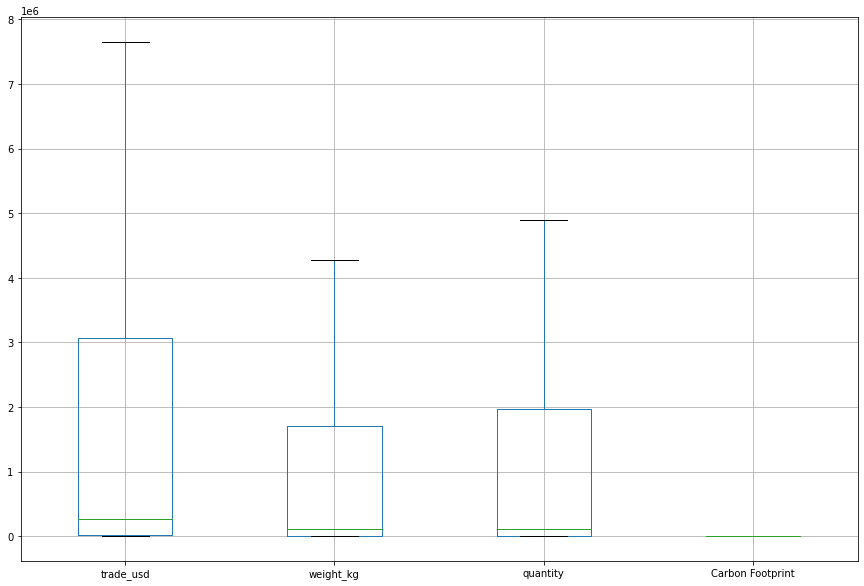

In [23]:
merged_df.iloc[:,1:].boxplot(figsize=(15,10));

,Country,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category,Carbon Footprint
0,Afghanistan,"Sheep, live",Export,6088.000,2339.0,Number of items,51.00,01_live_animals,0.18
1,Afghanistan,"Goats, live",Export,3958.000,984.0,Number of items,53.00,01_live_animals,0.18
2,Albania,"Bovine animals, live, except pure-bred breeding",Import,2414533.000,1114023.0,Number of items,6853.00,01_live_animals,0.87
3,Albania,"Swine, live except pure-bred breeding > 50 kg",Import,7648728.875,4270997.0,Number of items,96040.00,01_live_animals,0.87
4,Albania,"Fowls, live domestic < 185 grams",Import,2671732.000,254652.0,Number of items,4895775.75,01_live_animals,0.87
...,...,...,...,...,...,...,...,...,...
37403,Madagascar,"Seaweeds and other algae,",Export,1014203.000,1687717.0,Weight in kilograms,1687717.00,12_oil_seed_oleagic_fruits_grain_seed_fruit_et...,0.07
37404,Madagascar,Vegetable products nes for human consumption,Import,4137.000,1369.0,Weight in kilograms,1369.00,12_oil_seed_oleagic_fruits_grain_seed_fruit_et...,0.07
37405,Madagascar,"Cereal straw & husks, unprepared",Export,11.000,4.0,Weight in kilograms,4.00,12_oil_seed_oleagic_fruits_grain_seed_fruit_et...,0.07
37406,Madagascar,Lucerne (alfalfa) meal and pellets,Import,1720.000,2000.0,Weight in kilograms,2000.00,12_oil_seed_oleagic_fruits_grain_seed_fruit_et...,0.07


In [ ]:
commodity_final = commodity_final.drop(columns=['Country','Region', 'Population (millions)','HDI','Total Ecological Footprint','Data Quality','Countries Required','Earths Required','Biocapacity Deficit or Reserve','Total Biocapacity'])

### Gestion  Encoding + Rescaling 

In [ ]:
##encodage
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
merged_df['Country'] = encoder.fit_transform(merged_df['Country'])
merged_df['commodity'] = encoder.fit_transform(merged_df['commodity'])
merged_df['flow'] = encoder.fit_transform(merged_df['flow'])
merged_df['quantity_name'] = encoder.fit_transform(merged_df['quantity_name'])
merged_df['category'] = encoder.fit_transform(merged_df['category'])



In [ ]:
merged_df.dtypes 

In [ ]:
merged_df.plot(kind='density',figsize=(13,5))
plt.title('All variables with different scales', fontsize=20)
plt.show()

In [ ]:
merged_df.columns

In [ ]:
ss = StandardScaler()
numerical_cols = ['Country', 'commodity', 'flow', 'trade_usd', 'weight_kg',
       'quantity_name', 'quantity', 'category', 'Carbon Footprint'] # replace with actual numerical column names
merged_df_cp = merged_df[numerical_cols]
ssr = ss.fit_transform(merged_df_cp)
merged_df_rescaled = pd.DataFrame(ssr, columns=numerical_cols)




In [ ]:
merged_df_rescaled.plot(kind='density',figsize=(13,5))
plt.title('All variables with different scales', fontsize=20)
plt.show()

In [ ]:
merged_df_rescaled.tail()

In [ ]:
merged_df_rescaled.describe

# Feature Selection / Dimension Reduction

In [ ]:
X =merged_df_rescaled.drop('commodity', axis=1)
y = merged_df_rescaled['commodity']
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [ ]:
#  principal component analysis (PCA) sont deux méthodes de valeurs propres utilisées pour réduire un ensemble de données de grande dimension en moins de dimensions tout en conservant des informations importantes.

# ACP

In [ ]:
# Calcul des composantes principales
# Le nombre de composantes (K) n’étant pas spécifié, il est par défaut égal au nombre de variables (K = p)
pca = PCA(svd_solver='full')
coord = pca.fit_transform(X)
coord

In [ ]:

# Vérification des valeurs manquantes
print(merged_df_rescaled.isna().sum())



# Vérification des types de données
print(merged_df_rescaled.dtypes)

# Conversion des données en float64
merged_df_rescaled = merged_df_rescaled.astype(float)

# Création de X en excluant la colonne 'commodity'
X = merged_df_rescaled.drop('commodity', axis=1)

# Exécution de la PCA
pca = PCA(svd_solver='full')
coord = pca.fit_transform(X)
coord

In [ ]:
pca.n_components_

In [ ]:
pca.explained_variance_

In [ ]:
pca.explained_variance_ratio_

In [ ]:
#nombre d'observations
n = X.shape[0]
#nombre de variables
p = X.shape[1]
eig = eigval = (n-1)/n*pca.explained_variance_
eigval

In [ ]:
# barplot des valeurs propres
plt.bar(np.arange(1,p+1),eigval);
plt.title("Barplot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

In [ ]:
#scree plot
plt.plot(np.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

In [ ]:
#cumul de variance expliquée
plt.plot(np.arange(1,p+1),np.cumsum(pca.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Accumulative explained variance ratio")
plt.xlabel("Factor number")
plt.show()
np.cumsum(pca.explained_variance_ratio_)

### Analyse des individus

In [ ]:
#contribution des individus dans l'inertie totale
di = np.sum(X**2,axis=1)
#qualité de représentation des individus - COS2
cos2 = coord**2
for j in range(p):
    cos2[:,j] = cos2[:,j]/di
#contributions aux axes
ctr = coord**2
for j in range(p):
    ctr[:,j] = ctr[:,j]/(n*eigval[j])

pd.DataFrame({'Inertie':di,'COS2_D1':cos2[:,0],'COS2_D2':cos2[:,1],'COS2_D3':cos2[:,2],'COS2_D4':cos2[:,3],
              'Contrib_D1':ctr[:,0],'Contrib_D2':ctr[:,1],'Contrib_D3':ctr[:,2],'Contrib_D4':ctr[:,3]})

In [ ]:
#positionnement des individus dans le plan
colors = ['blue','yellow']
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-10,10) #même limites en abscisse
axes.set_ylim(-10,10) #et en ordonnée
#conversion de y en entiers
y_int = y
#placement des étiquettes des observations
for i in range(n):
    plt.annotate(X.index[i],(coord[i,0],coord[i,1]),color=colors[y_int[i]])
#ajouter les axes
plt.plot([-10,10],[0,0],color='black',linestyle='-',linewidth=1)
plt.plot([0,0],[-10,10],color='black',linestyle='-',linewidth=1)
#affichage
plt.xlabel("Dim 1 (%0.2f %%)"% (pca.explained_variance_ratio_[0]*100))
plt.ylabel("Dim 2 (%0.2f %%)"% (pca.explained_variance_ratio_[1]*100))
plt.show()

In [ ]:

# Matrice de Corrélation
sqrt_eigval = np.sqrt(eigval)
corvar = np.zeros((p,p))
for k in range(p):
    corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]
#cosinus carré des variables (qualité de représentation)
cos2var = corvar**2
#contributions
ctrvar = cos2var
for k in range(p):
    ctrvar[:,k] = ctrvar[:,k]/eigval[k]

    
pd.DataFrame({'id':X.columns,'COR_D1':corvar[:,0],'COR_D2':corvar[:,1], 'COR_D3':corvar[:,2],'COR_D4':corvar[:,3],
              'COS2_D1':cos2var[:,0],'COS2_D2':cos2var[:,1], 'COS2_D3':cos2var[:,2],'COS2_D4':cos2var[:,3],
              'Contrib_D1':ctrvar[:,0],'Contrib_D2':ctrvar[:,1],'Contrib_D3':ctrvar[:,2],'Contrib_D4':ctrvar[:,3]})

In [ ]:
#corrélation de la cible avec les axes factoriels
corSupp = np.zeros((1,p))
for k in range(p):
    corSupp[0,k] = np.corrcoef(y,coord[:,k])[0,1]
corSupp

In [ ]:
#cercle des corrélations du plan
fig, axes = plt.subplots(figsize=(10,10))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#affichage des variables actives
for j in range(p):
    plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]),color='blue')
    plt.annotate("",
              xy=(0, 0), xycoords='data',
              xytext=(corvar[j,0],corvar[j,1]), textcoords='data',
              arrowprops=dict(color='blue',arrowstyle='<|-',
                              connectionstyle="arc3,rad=0."), 
              )
#affiche des variables illustratives (y)
plt.annotate('Country',(corSupp[0,0],corSupp[0,1]),color='red')
plt.annotate("",
              xy=(0, 0), xycoords='data',
              xytext=(corSupp[0,0],corSupp[0,1]), textcoords='data',
              arrowprops=dict(color='red',arrowstyle='<|-',
                              connectionstyle="arc3,rad=0."), 
              )
#ajouter les axes
plt.plot([-1,1],[0,0],color='black',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='black',linestyle='-',linewidth=1)
#ajouter un cercle
cercle = plt.Circle((0,0),1,color='black',fill=False)
axes.add_artist(cercle)
#affichage
plt.xlabel("Dim 1 (%0.2f %%)"% (pca.explained_variance_ratio_[0]*100))
plt.ylabel("Dim 2 (%0.2f %%)"% (pca.explained_variance_ratio_[1]*100))
plt.show()